# FSPS Test Notebook
Testing the Python wrapper for Fortran `fsps` program. Complied via `gfortran` command in shell. Note that directory to fsps folder needs to be defined an environment variable e.g. `SPS_HOME=/path/to/fsps`. From the [docs](https://dfm.io/python-fsps/current/stellarpop_api/).

In [1]:
import os
os.environ['SPS_HOME'] = 'fsps'

import fsps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Initialise stellar population. Note that `fsps.StellarPopulation` should ideally only be run once in a script.

Important parameters:
- `sfh`: star formation history (default=0 i.e. single stellar population)
- `dust_type`: defines attenuation curve for dust around 'old' stars (default=0 i.e. power-law)
- `fagn`: total luminosity of AGN
- `zcontinous`: flag for metallicity interpolation (default=0 i.e. no interpolation)
- `add_neb_emission`: boolean to use a nebular emission model (default=False)
- `zred`: redshift; must be in conjunction with `redshift_colors=1` to take effect
- `zmet`: metallicity integer; only used when `zcontinuous=0`
- `imf_type`: flag for IMF type (default=2 i.e. Kroupa 2001)

In [2]:
sp = fsps.StellarPopulation(
    sfh=1,             # Exponentially declining SFH
    tau=10.0,          # Long tau ~ constant SFR
    const=1.0,         # Constant component to SFR
    logzsol=0.0,       # Solar metallicity
    imf_type=1,        # Kroupa IMF
    dust_type=2,       # Charlot & Fall dust
    dust2=0.5,         # Moderate ISM dust
    dust1=1.0,         # Birth cloud dust
    add_neb_emission=True,
    add_dust_emission=True,
    gas_logu=-2.0,
    gas_logz=0.0,
)

There are several options for isochrone, spectral, and dust emission libraries. These are:
#### Stellar Isochrone Libraries
- MIST (default)
- PADOVA
- PARSEC
- BPASS
- BASTI
- GENEVA
#### Stellar Spectral Libraries
- MILES (default)
- BASEL
#### Dust Emission Libraries
- DL07 (default)
- THEMIS

Changing libraries from the defaults requires uninstalling and reinstalling fsps with the desired flags e.g.
```bash
pip uninstall fsps
FFLAGS="-DMIST=0 -DPADOVA=1 -DMILES=0 -DBASEL=1" python -m pip install fsps --no-binary fsps
```

In [3]:
# Check loaded libraries, currently set to defaults
sp.libraries

(b'pdva', b'miles', b'DL07')

Get photometry in specified filter system. List of available FSPS filters [here](https://dfm.io/python-fsps/current/filters/). 

In [4]:
sdss_bands = fsps.find_filter('sdss')
sdss_mags = sp.get_mags(tage=13.7, bands=sdss_bands)
pd.DataFrame({'band': sdss_bands, 'magnitude': sdss_mags})

,band,magnitude
0,sdss_u,6.867885
1,sdss_g,5.848845
2,sdss_r,5.441714
3,sdss_i,5.269817
4,sdss_z,5.127067


Plot spectrum of synthetic stellar population using `get_spectrum`. Wavelength grid given in Angstroms and spectrum in $L_\odot/\text{Hz}$.

(0.0, 1e-14)

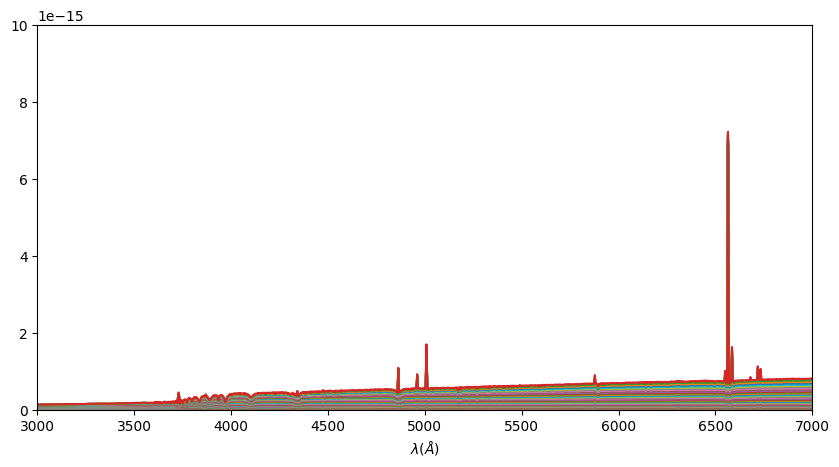

In [5]:
wav, spec = sp.get_spectrum()

plt.figure(figsize=(10, 5))
plt.plot(wav, spec.T)
plt.xlabel('$\\lambda (\\AA)$')
plt.xlim(3000,7000)
plt.ylim(0,1e-14)
#plt.yscale('log')

In [7]:
len(sp.ssp_ages)

94